In [69]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import copy


In [70]:
##Functions
def t(x,i):
    if i == 1 :
        a = x/2
        return a
    else:
        a = (x+1)/2
        return a

def inv(x,n):
    return math.floor(x*n)

def tf(F,j):
    n = F.size
    Aux = copy.deepcopy(F)
    
    for i in range(n):
        x = i/n
        x = t(x,j)
        Aux[i] = F[inv(x,n)]
    return Aux


#Negative cantor distance function with depth n
def A(x,n):
    res = x-1/2
    for i in range(1,n+1):
        aux = 1/(pow(3,i))
        res = res + aux
        if abs(res)>abs(res-2*aux):
            res = res-2*aux
    return -abs(res)

def Avector(n,m):
    AV = np.zeros(n)
    for i in range(n):
        AV[i] = A(i/n,m)
    return AV

def G(N,n,m):
    F = np.zeros(n)
    for i in range(N):
        F1 = tf(F,1)
        F2 = tf(F,2)
        for j in range(n):
            F1[j] = F1[j] + A(t(j/n,1),m)
            F2[j] = F2[j] + A(t(j/n,2),m)
        F = (np.maximum(F1,F2)+F)/2
        F = F - np.amax(F)
    return [F,F1,F2]

#T 2xmod1
def T(F):
    Aux = copy.deepcopy(F)
    n = F.size
    for i in range(n):
        x = i/n
        x = 2*x
        if x > 1:
            x = x - 1
        j = math.floor(n*x)
        if j>=n:
            j=n-1
        
        Aux[i] = F[j]
    return Aux

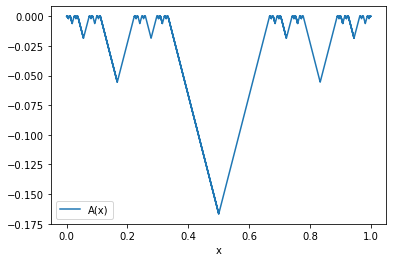

In [18]:
# A graph

n = 100000
m=100
Result = Avector(n,m)

F = list(Result)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","A(x)"])

ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1]);
ax.figure.savefig('../imagens/ex5_potential.pdf')

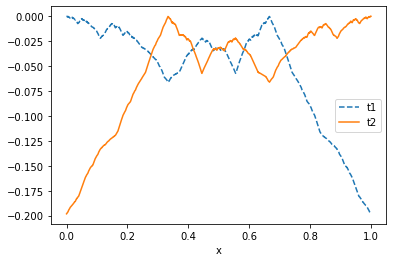

In [21]:
## G Iterations and plot
n = 10000
N = 30
m=50
Result = G(N,n,m)
F1 = Result[1]
F2 = Result[2]
yup = max(np.amax(F1),np.amax(F2))
F1 = F1 - yup
F2 = F2 - yup

F = list(F1)
X = list(np.array(range(n))/n)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","t1"])

F = list(F2)
X = list(np.array(range(n))/n)
D = list(zip(X,F))

Resultd2 = pd.DataFrame(data = D ,columns = ["x","t2"])

ymin = np.amin(F1)
ymin = min(ymin,np.amin(F2))

##PLOT
ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--');
Resultd2.plot(ax=ax,x = Resultd2.columns.values[0], y = Resultd2.columns.values[1]);
ax.set_ylim([ymin-0.01,0.01])


#save plot
ax.figure.savefig('../imagens/ex5_branches.pdf')

In [71]:
#Analytical branches

#n terms and depth m
def L(x,n,m):
    res = 0
    for i in range(n):
        x = x/2
        res = res + A(x,m)
    return res

def eta(x):
    return t(t(x,1),2)

# n terms, depth m
def H(x,n,m):
    res = 0
    for i in range(n):
        res = res + A(t(x,1),m) + A(eta(x),m)
        x = eta(x)
    return res

def V(x,n,m):
    if x<1/2:
        return L(x,n,m)
    else:
        return L(1-x,n,m)
    
def W(x,n,m):
    if x<1/2:
        return H(1-x,n,m)
    else:
        return H(x,n,m)
    
#N points, n terms, m depth
def V_vector(N,n,m):
    Vector = np.zeros(N)
    for i in range(N):
        Vector[i] = V(i/N,n,m)
    return Vector
        
#N points, n terms, m depth
def W_vector(N,n,m):
    Vector = np.zeros(N)
    for i in range(N):
        Vector[i] = W(i/N,n,m)
    return Vector
        

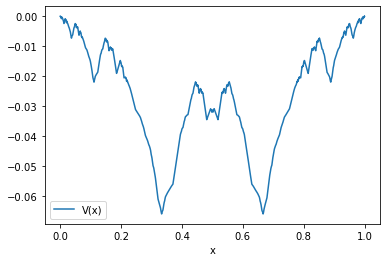

In [66]:
#PLOT V

N = 10000
n = 10
m = 50
Result = V_vector(N,n,m)

F = list(Result)
X = list(np.array(range(N))/N)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","V(x)"])

ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1]);
ax.figure.savefig('../imagens/ex5_V.pdf')

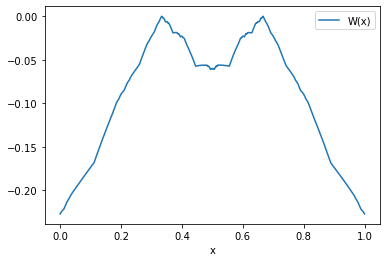

In [67]:
#PLOT W

N = 10000
n = 10
m = 50
Result = W_vector(N,n,m)

F = list(Result)
X = list(np.array(range(N))/N)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","W(x)"])

ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1]);
ax.figure.savefig('../imagens/ex5_W.pdf')

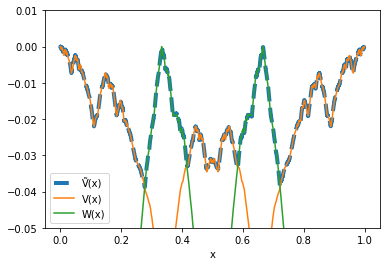

In [91]:
#Comparison plot
N = 10000
n = 10
m = 50

#G 30 iteration, N points-mesh, cantor m-depth
Result = G(30,N,m)
F = list(Result[0])
X = list(np.array(range(N))/N)
D = list(zip(X,F))
Resultd1 = pd.DataFrame(data = D ,columns = ["x","Ṽ(x)"])

Result = V_vector(N,n,m)
F = list(Result)
X = list(np.array(range(N))/N)
D = list(zip(X,F))
Resultd2 = pd.DataFrame(data = D ,columns = ["x","V(x)"])

Result = W_vector(N,n,m)
F = list(Result)
X = list(np.array(range(N))/N)
D = list(zip(X,F))
Resultd3 = pd.DataFrame(data = D ,columns = ["x","W(x)"])

ymin = -0.04

ax = Resultd1.plot(x = Resultd1.columns.values[0], y = Resultd1.columns.values[1],style = '--',linewidth=4);
Resultd2.plot(ax=ax,x = Resultd2.columns.values[0], y = Resultd2.columns.values[1]);
Resultd3.plot(ax=ax,x = Resultd3.columns.values[0], y = Resultd3.columns.values[1]);
ax.set_ylim([ymin-0.01,0.01])

ax.figure.savefig('../imagens/ex5_compare.pdf')